In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

tf.__version__

'1.13.1'

In [3]:
import glob
# import imageio  # To generate GIFs
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [4]:
# TODO: Import own dataset of kidney stone
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


## Preprocessing

We need to make sure images in the dataset have shape of (*size*, *size*, channels).  
We also normalize pixels value to ease learning.

In [11]:
train_images.shape

(60000, 28, 28, 1)

In [10]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') # MNIST dataset doesn't have channel
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

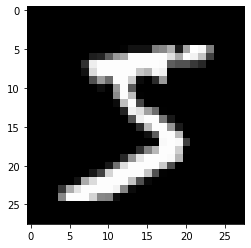

In [15]:
plt.imshow(train_images[0,:,:,0], cmap='gray')

## Generator

In [8]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

### Test Generator

Tensor("sequential_20/conv2d_transpose_56/Tanh:0", shape=(1, 28, 28, 1), dtype=float32)


FailedPreconditionError: Error while reading resource variable batch_normalization_v1_56/gamma from Container: localhost. This could mean that the variable was uninitialized. Not found: Container localhost does not exist. (Could not find resource: localhost/batch_normalization_v1_56/gamma)
	 [[node sequential_20/batch_normalization_v1_56/ReadVariableOp (defined at <ipython-input-37-cfa8f119417a>:4) ]]

Caused by op 'sequential_20/batch_normalization_v1_56/ReadVariableOp', defined at:
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-cfa8f119417a>", line 4, in <module>
    generated_image = generator(noise, training=False)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 554, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 230, in call
    return super(Sequential, self).call(inputs, training=training, mask=mask)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\keras\engine\network.py", line 815, in call
    mask=masks)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\keras\engine\network.py", line 1002, in _run_internal_graph
    output_tensors = layer.call(computed_tensor, **kwargs)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\keras\layers\normalization.py", line 572, in call
    outputs = self._fused_batch_norm(inputs, training=training)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\keras\layers\normalization.py", line 457, in _fused_batch_norm
    training, _fused_batch_norm_training, _fused_batch_norm_inference)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\keras\utils\tf_utils.py", line 54, in smart_cond
    pred, true_fn=true_fn, false_fn=false_fn, name=name)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\framework\smart_cond.py", line 56, in smart_cond
    return false_fn()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\keras\layers\normalization.py", line 454, in _fused_batch_norm_inference
    data_format=self._data_format)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\ops\nn_impl.py", line 1152, in fused_batch_norm
    scale = ops.convert_to_tensor(scale, name="scale")
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\framework\ops.py", line 1039, in convert_to_tensor
    return convert_to_tensor_v2(value, dtype, preferred_dtype, name)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\framework\ops.py", line 1097, in convert_to_tensor_v2
    as_ref=False)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\framework\ops.py", line 1175, in internal_convert_to_tensor
    ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 1222, in _dense_var_to_tensor
    return var._dense_var_to_tensor(dtype=dtype, name=name, as_ref=as_ref)  # pylint: disable=protected-access
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 1177, in _dense_var_to_tensor
    return self.value()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 644, in value
    return self._read_variable_op()
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 728, in _read_variable_op
    self._dtype)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\ops\gen_resource_variable_ops.py", line 549, in read_variable_op
    "ReadVariableOp", resource=resource, dtype=dtype, name=name)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Programmes\Developpement\Anaconda3\envs\Master2IA\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Error while reading resource variable batch_normalization_v1_56/gamma from Container: localhost. This could mean that the variable was uninitialized. Not found: Container localhost does not exist. (Could not find resource: localhost/batch_normalization_v1_56/gamma)
	 [[node sequential_20/batch_normalization_v1_56/ReadVariableOp (defined at <ipython-input-37-cfa8f119417a>:4) ]]


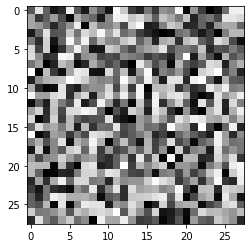

<Figure size 432x288 with 0 Axes>

In [37]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
print(np.array(generated_image))

plt.figure()
plt.imshow(np.random.rand(28, 28), cmap='gray')

plt.figure()
sess = tf.compat.v1.Session()
plt.imshow(sess.run(generated_image)[0, :, :, 0], cmap='gray')

## Discriminator

In [27]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [29]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

Tensor("sequential_13/dense_13/BiasAdd:0", shape=(1, 1), dtype=float32)
